In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def eval_preds(y_true, y_pred):
    error = y_true - y_pred

    rmse = np.mean(np.sqrt((error ** 2)))
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs((error / y_true)))

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

    line_pts = [np.min(y_true), np.max(y_true)]
    plt.scatter(y_true, y_pred)
    plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Fit")
    plt.show()

<IPython.core.display.Javascript object>

* Investigate `boston_data` what are we working with.  How could we put this in a dataframe with column names?
* What are we predicting?

In [4]:
boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


<IPython.core.display.Javascript object>

In [5]:
X = pd.DataFrame(boston_data["data"], columns=boston_data["feature_names"])
y = boston_data["target"]

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<IPython.core.display.Javascript object>

* Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

* Fit a `DecisionTreeRegressor` with default hyperparameters and report the train and test scores

In [7]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 1.0
test_score: 0.8326266951177871


<IPython.core.display.Javascript object>

rmse 0.00
mae 0.00
mape 0.00


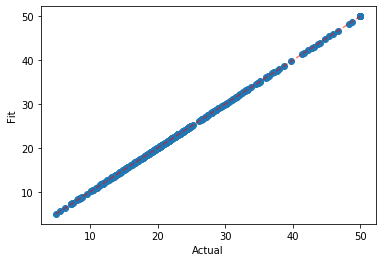

<IPython.core.display.Javascript object>

In [8]:
y_pred = model.predict(X_train)
eval_preds(y_train, y_pred)

rmse 2.66
mae 2.66
mape 0.14


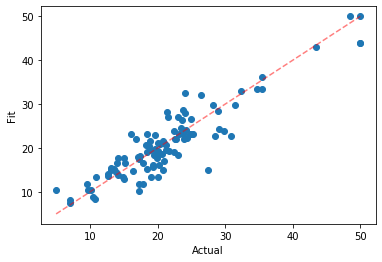

<IPython.core.display.Javascript object>

In [9]:
y_pred = model.predict(X_test)
eval_preds(y_test, y_pred)

* Plot the decision tree (we'll just use `plot_tree` here instead of pydotplus). This will take a while...

In [10]:
# plt.figure(figsize=(10, 10))
# plot_tree(model, filled=True, feature_names=X_train.columns)
# plt.show()

<IPython.core.display.Javascript object>

* Play with the hyperparameters: `max_depth`, `max_leaf_nodes`, & `min_samples_leaf`
* What are these doing?  (answer by documentation and/or playing)

In [24]:
# Use GridSearchCV to select best combination
# from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=12, min_samples_leaf=30)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

train_score: 0.742894491232623
test_score: 0.6752356229117648


<IPython.core.display.Javascript object>

rmse 3.12
mae 3.12
mape 0.16


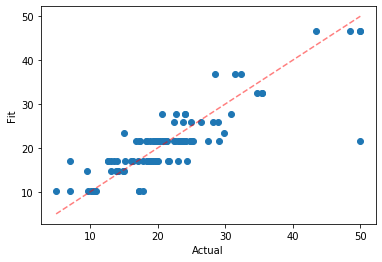

<IPython.core.display.Javascript object>

In [19]:
y_pred = model.predict(X_test)
eval_preds(y_test, y_pred)

* Replot (if you used small values above, dont waste time on plotting if hyperparameters large)

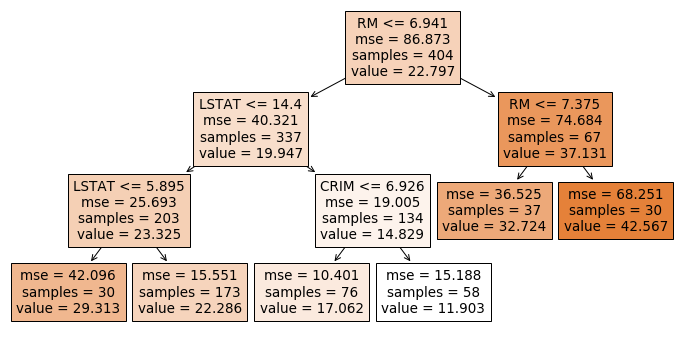

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

In [44]:
[a for a in dir(model) if a.endswith("_") and not a.endswith("__")]

['classes_',
 'feature_importances_',
 'max_features_',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'tree_']

<IPython.core.display.Javascript object>

In [37]:
model.get_depth()

3

<IPython.core.display.Javascript object>

In [38]:
model.get_n_leaves()

6

<IPython.core.display.Javascript object>